<a href="https://colab.research.google.com/github/ketanhdoshi/ml/blob/master/examples/Pandas_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examples from this article - http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})
df

,age,gender,name,num_children,num_pets,state
0,23,M,john,2,5,california
1,78,F,mary,0,1,dc
2,22,M,peter,0,0,california
3,19,M,jeff,3,5,dc
4,45,M,bill,2,2,california
5,33,F,lisa,1,2,texas
6,20,M,jose,4,3,texas


### Plot two dataframe columns as a scatter plot

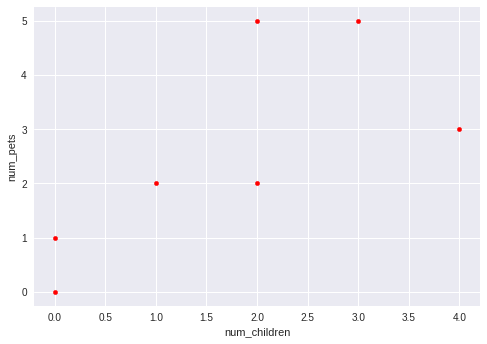

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

### Plot column values as a bar plot

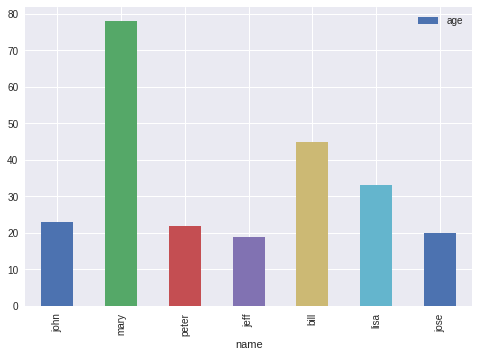

In [ ]:
df.plot(kind='bar',x='name',y='age')

### Line plot with multiple columns

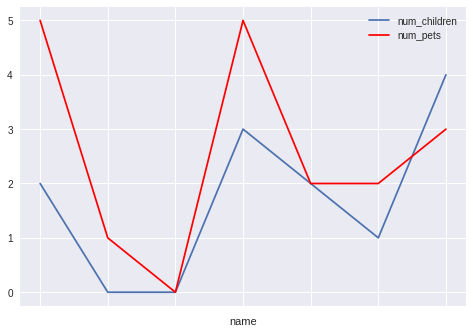

In [ ]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

### Save plot to file

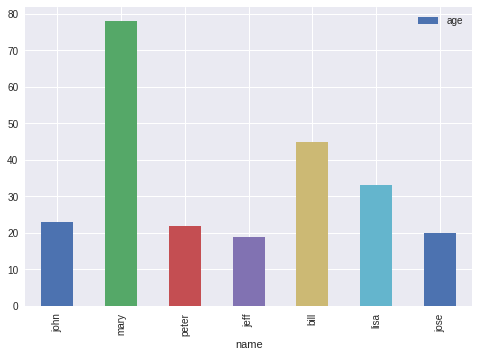

In [ ]:
df.plot(kind='bar',x='name',y='age')

# the plot gets saved to 'output.png'
plt.savefig('output.png')

### Stacked bar plot with group by

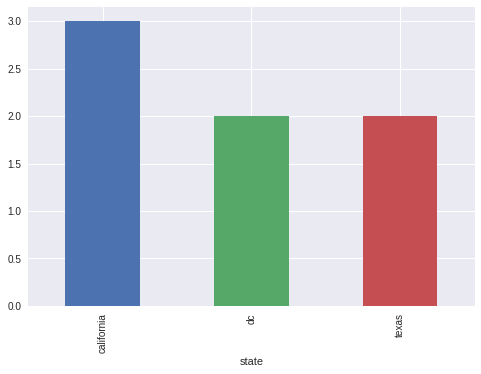

In [ ]:
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

### Stacked bar plot with two-level group by

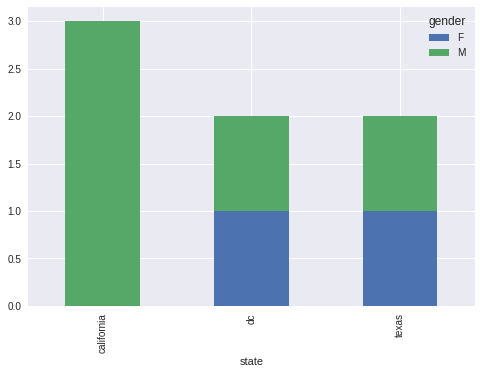

In [ ]:
df.groupby(['state','gender'])['name'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

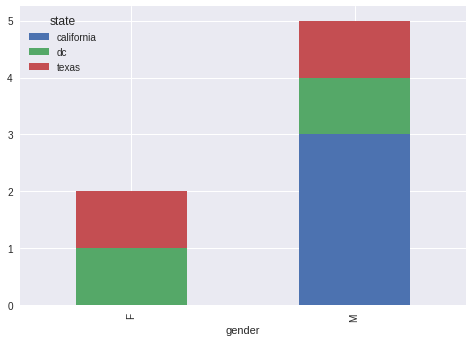

In [ ]:
# Another example: count the people by gender, spliting by state
df.groupby(['gender','state'])['age'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

### Plot a histogram of column values

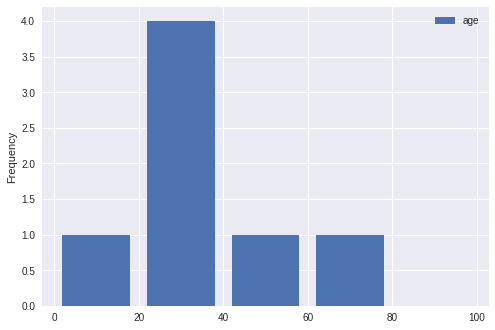

In [ ]:
df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

### Date Histogram

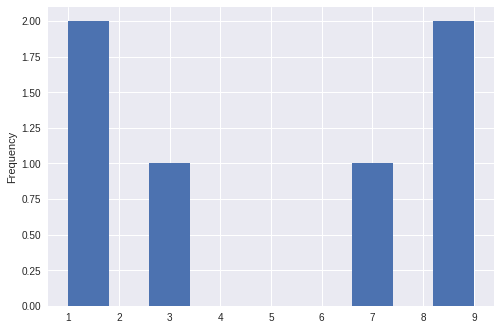

In [ ]:
# To plot a date histogram, you must first convert the date column to datetime using pandas.to_datetime()
df = pd.DataFrame({
    'name':['john','lisa','peter','carl','linda','betty'],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})

# Now convert the date column into datetime type and use plot(kind='hist')
# The column is now of type datetime64[ns] (Even though they still look like strings)
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],infer_datetime_format=True)

plt.clf()
# Each object is a regular Python datetime.Timestamp object. Map each one to its month and plot
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist')
plt.show()